# Divine Comedy Generation

In order to showcase our project results here a demo to run our main script "generete_dante.py" and see our Canto printed out with all the requirements needed as:
- terzine structure 
- hendecasyllable verse
- rhyme scheme

In [1]:
import os
import sys
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR')

from dante_by_tonedrev_syl.data_preparation import text_in_rev_syls, text_in_syls_rhyme
from dante_by_tonedrev_syl.text_processing import prettify_text, special_tokens, remove_punctuation
from dante_by_tonedrev_syl.generate_dante import generate_text
from utils import save_vocab, load_vocab, save_syls_list, load_syls_list

working_dir = os.path.join(os.path.abspath('.'), 'dante_by_tonedrev_syl')


### Loading the rhyme and verse vocabularies

In [2]:
logs_dir = os.path.join(working_dir, 'logs')
os.makedirs(logs_dir, exist_ok = True) 
vocab_file_rhyme = os.path.join(logs_dir, 'vocab_rhyme.json')
vocab_file_verse = os.path.join(logs_dir,  'vocab_verse.json')

vocab_rhyme, idx2syl_rhyme, syl2idx_rhyme = load_vocab(vocab_file_rhyme)
vocab_verse, idx2syl_verse, syl2idx_verse = load_vocab(vocab_file_verse)

vocab_size_rhyme = len(vocab_rhyme)
vocab_size_verse = len(vocab_verse)


### Loading the rhyme and verse models already trained

In [3]:
models_dir = os.path.join(working_dir, 'models')
os.makedirs(models_dir, exist_ok = True) 
model_file_verse = os.path.join(models_dir, "dante_by_tonedrev_syl_verse_model.h5")
model_file_rhyme = os.path.join(models_dir, "dante_by_tonedrev_syl_rhyme_model.h5")

model_verse = tf.keras.models.load_model(model_file_verse)
model_rhyme = tf.keras.models.load_model(model_file_rhyme)


### Models summary

In [4]:
# model_rhyme.summary()
# print('\n')
# model_verse.summary()

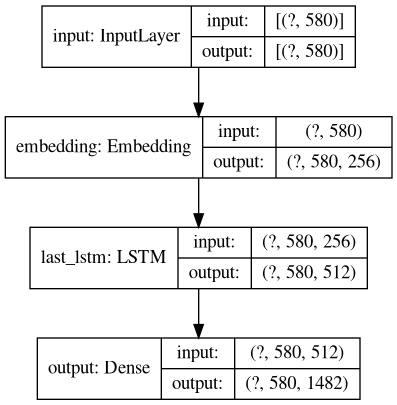

In [5]:
tf.keras.utils.plot_model(model_rhyme,  to_file='/tmp/model_rhyme.png', show_shapes=True, show_layer_names=True)

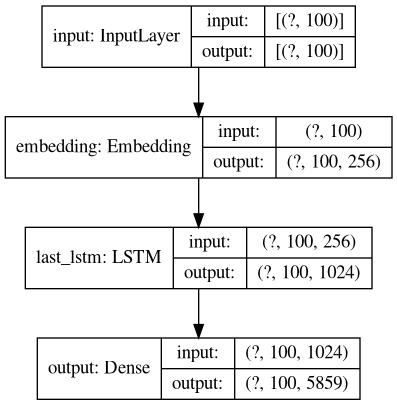

In [6]:
tf.keras.utils.plot_model(model_verse, to_file='/tmp/model_verse.png', show_shapes=True, show_layer_names=True)

### Loading sequence of rhyme to build the start sequence for starting generation

In [7]:
SEQ_LENGTH_RHYME = model_rhyme.get_layer('embedding').output.shape[1]

text_in_syls_rhyme_file = os.path.join(working_dir, 'text_in_syls_rhyme.json')

if os.path.isfile(text_in_syls_rhyme_file):
    syls_rhyme_list = load_syls_list(text_in_syls_rhyme_file)
else:
    syls_rhyme_list = text_in_syls_rhyme(divine_comedy)
    save_syls_list(syls_rhyme_list, text_in_syls_rhyme_file)

# syls_rhyme_list = text_in_syls_rhyme(divine_comedy)

#index_eoc = syls_rhyme_list.index(special_tokens['END_OF_CANTO']) + 1
indexes = [i for i, x in enumerate(syls_rhyme_list) if x == special_tokens['END_OF_CANTO'] and i > SEQ_LENGTH_RHYME]
index_eoc = np.random.choice(indexes) + 1
start_idx = max(0, index_eoc - SEQ_LENGTH_RHYME)
start_seq_rhyme = syls_rhyme_list[start_idx:index_eoc]

### Loading sequence of verse to build the start sequence for starting generation

In [8]:
SEQ_LENGTH_VERSE = model_verse.get_layer('embedding').output.shape[1]

text_in_syls_verse_file = os.path.join(working_dir, 'text_in_syls_verse.json')

if os.path.isfile(text_in_syls_verse_file):
    syls_verse_list = load_syls_list(text_in_syls_verse_file)
else:
    syls_verse_list = text_in_rev_syls(divine_comedy)
    save_syls_list(syls_verse_list, text_in_syls_verse_file)

# syls_verse_list = text_in_rev_syls(divine_comedy)

indexes = [i for i, x in enumerate(syls_verse_list) if x == special_tokens['END_OF_VERSO'] and i > SEQ_LENGTH_VERSE]
index_eov = np.random.choice(indexes)
start_idx = max(0, index_eov - SEQ_LENGTH_VERSE)
start_seq_verse = syls_verse_list[start_idx:index_eov]

### Generating the new text

In [19]:
generated_text, generated_text_no_tone = generate_text(model_rhyme, model_verse, special_tokens, vocab_size_rhyme, vocab_size_verse, syl2idx_rhyme, idx2syl_rhyme, syl2idx_verse, idx2syl_verse, SEQ_LENGTH_RHYME, SEQ_LENGTH_VERSE, start_seq_rhyme, start_seq_verse, temperature=1.0)

CANTO
non vèdi tùtta fìa ne la prìma gìalèppe
o te poèta ne la vòce chiòccia
per te semènte il còrpo mi fa sèppe

che vègno in pàrte òve non ti nòccia
quàndo però che nel mòto ch'èlli àbbia
peràr quàndo ambedùe le nòtte ròccia

vòlsimi a la sinìstra nòstra làbbia
e 'l buòn maèstro pèrder rilùpo
e ìo vìdi un centàuro pièn di ràbbia

fidamènte chi ciò bène lo cùpo
per marèmma di spirìta rachèle
virtù di quèlla vìsta del strùpo

sèmpre l'amòr de la mènte che si vèle
e còme quèl da ùna còrnice fiàcca
tre spècchi prenderài e i dùe fedèle

per quèl capèstro a dìo si dilàcca
che vìnta da formàni per la rìpa
latìna fontàna còme sàcca

o per l'ùna o per l'àltra de le stìpa
mi sèmbri veramènte quànt' ìo vìddi
che la memòria il sàngue àncor mi scìpa

perché per ettèrni dìo in te rìddi
ciò che da la cìma di cùi s'intòppa
prìa che tu vèdi quànta gènte rìddi

con tròppa prèsso sòno in sùa pàglia è tròppa
con tìca dèstra per l'aère sì grand' ùrli
pòscia ch'ìo èbbi nève la dèstra pòppa

pregàr da chìr


turàle è sèmpre dòve la giustìzia
che tàrdo sù l'aère va quàl per fèrmo
quàndo a te sì per sùa milìzia

e un che s'èlli infìno al picciòl vèrmo
fer la volontà ne le gènti antìche
atèmi cominciò per fèsta per fèrmo

e quànto vèrso nòi ci fòrmiche
per l'aère lì discèse de la vàlle
èra mi pareàn la fìde a la bìche

rispuòse il dùca mìo su per le spàlle
pesàndo l'un con l'àltro in sul groppòne
per ch'ìo mi vòlsi per pòvero càlle

lo règno de la lussùria sermòne
non dispensàre o dùe o tre stimolàti
che vìa savemènza a tre persòne

le mùra mi scùno a sé poggiàti
gràve a la tèrra mìa bàtta la tègghia
con vèna li vòstri alimènti làti

or par che già mài menàre strègghia
là dòve purgaràte dal segnòrso
li battersi concàrne e me rivègghia

che guàrda tùtto quànto spèsso il mòrso
e ìo vìdi un centàuro pièn di ràbbia
ìo fùi di crèder ch'ìo èra più soccòrso

e sì traèvan giù l'ùnghie la scàbbia
e s'ìo mi maravigliàr ché le scàglie
parièno rividìl più làrghe l'àbbia

quànd' ìo apprèsso il pàdre ti d

In [20]:
generated_canto_file = os.path.join('.', "generated_cantos", "generated_canto.txt")
with open(generated_canto_file,"w") as f:
    f.write(prettify_text(generated_text_no_tone, special_tokens))

## EVALUATION

In [21]:
#import
import os
import sys
sys.path.append(os.path.join('.', 'other_metrics') )
import other_metrics.metrics as om
from other_metrics.ngrams_plagiarism import ngrams_plagiarism

import our_metrics.metrics as m
from dante_by_rev_syl.text_processing import clean_comedy
from evaluate_metrics import evaluate_other_metrics, evaluate_our_metrics

In [22]:
#generated canto
generated_canto_file = os.path.join('.', "generated_cantos", "generated_canto.txt")
with open(generated_canto_file,"r", encoding='utf-8') as f:
    generated_canto = f.read()

#divine comedy
divine_comedy_file = os.path.join('.', "divina_commedia", "divina_commedia_accent_UTF-8.txt") 
with open(divine_comedy_file,"r", encoding='utf-8') as f:
    divine_comedy = f.read()

divine_comedy = clean_comedy(divine_comedy, special_tokens)
divine_comedy = prettify_text(divine_comedy, special_tokens)
divine_comedy = remove_punctuation(divine_comedy)

evaluation_results = {}

In [23]:
print(generated_canto)

CANTO
non vedi tutta fia ne la prima gialeppe
o te poeta ne la voce chioccia
per te semente il corpo mi fa seppe

che vegno in parte ove non ti noccia
quando però che nel moto ch'elli abbia
perar quando ambedue le notte roccia

volsimi a la sinistra nostra labbia
e 'l buon maestro perder rilupo
e io vidi un centauro pien di rabbia

fidamente chi ciò bene lo cupo
per maremma di spirita rachele
virtù di quella vista del strupo

sempre l'amor de la mente che si vele
e come quel da una cornice fiacca
tre specchi prenderai e i due fedele

per quel capestro a dio si dilacca
che vinta da formani per la ripa
latina fontana come sacca

o per l'una o per l'altra de le stipa
mi sembri veramente quant' io viddi
che la memoria il sangue ancor mi scipa

perché per etterni dio in te riddi
ciò che da la cima di cui s'intoppa
pria che tu vedi quanta gente riddi

con troppa presso sono in sua paglia è troppa
con tica destra per l'aere sì grand' urli
poscia ch'io ebbi neve la destra poppa

pregar da chir

In [24]:
## Evaluation other metrics on generated canto ### 
print('\nEVALUATING OTHER METRICS ON GENERATED CANTO...')
evaluation_results = evaluate_other_metrics(generated_canto, divine_comedy)

print('\nOTHER METRICS ON GENERATED CANTO:')
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v)) 

##################################################

### Evaluation our metrics on generated canto ####
print('\nEVALUATING OUR METRICS ON GENERATED CANTO...')
evaluation_results = evaluate_our_metrics(generated_canto)

print('\nOUR METRICS ON GENERATED CANTO:')
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v))

##################################################


EVALUATING OTHER METRICS ON GENERATED CANTO...

OTHER METRICS ON GENERATED CANTO:
Number of putative terzine: 107
Number of well formed terzine: 107
Average structuredness: 0.9976798143851509
Average hendecasyllabicness: 0.9385301614273578
Average rhymeness: 0.9842767295597482
Plagiarism: 0.8160520607375271

EVALUATING OUR METRICS ON GENERATED CANTO...

OUR METRICS ON GENERATED CANTO:
Number of verses: 322
Number of strophes: 108
Number of well formed terzine: 107
Last single verse: True
Average syllables per verse: 11.11 ± 0.58
Hendecasyllables by tone: 0.7795
Rhymeness score: 0.9290


In [25]:
# Test our metrics on one canto of divine comedy #
n_canto = 1
print('\nEVALUATING OUR METRICS ON {} CANTO OF DIVINE COMEDY...'.format(n_canto))
divine_comedy_canto_list = divine_comedy.split('CANTO')
divine_comedy_canto_list = [line.strip() for line in divine_comedy_canto_list if line != '']

evaluation_results = evaluate_our_metrics(divine_comedy_canto_list[n_canto-1])

print('\nOUR METRICS ON {} CANTO OF DIVINE COMEDY:'.format(n_canto))
for k, v in evaluation_results.items():
    print('{}: {}'.format(k, v))

##################################################


EVALUATING OUR METRICS ON 1 CANTO OF DIVINE COMEDY...

OUR METRICS ON 1 CANTO OF DIVINE COMEDY:
Number of verses: 136
Number of strophes: 46
Number of well formed terzine: 45
Last single verse: True
Average syllables per verse: 11.07 ± 0.41
Hendecasyllables by tone: 0.9044
Rhymeness score: 0.9710
